# Linear Regression: Gradient Descent and Loss Function Visualizations

This notebook covers:
- Linear regression basics
- Loss function for individual instances
- Batch, Stochastic, and Mini-batch Gradient Descent
- Visual understanding of how theta is updated
- Cost curve differences due to iteration counts

💡 **Why You Might Not See the Batch GD Line Clearly in the Cost Plot**:
- **Batch GD**: 100 iterations → 100 cost points
- **Stochastic GD**: 50 epochs × 100 samples = 5000 cost points
- **Mini-Batch GD**: 50 epochs × (100 / 20 batches) = 250 cost points

Because of this, Batch GD may appear as a dotted line or be less visible unless plotted with markers.


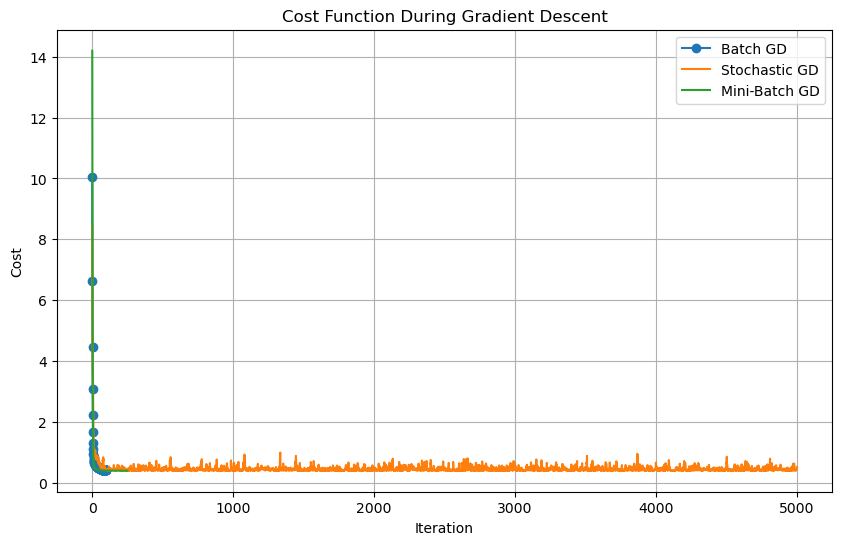

Final theta (Batch): [3.90668931 3.04241987]
Final theta (SGD): [4.11659321 2.39726945]
Final theta (Mini-Batch): [4.19813954 2.77868611]


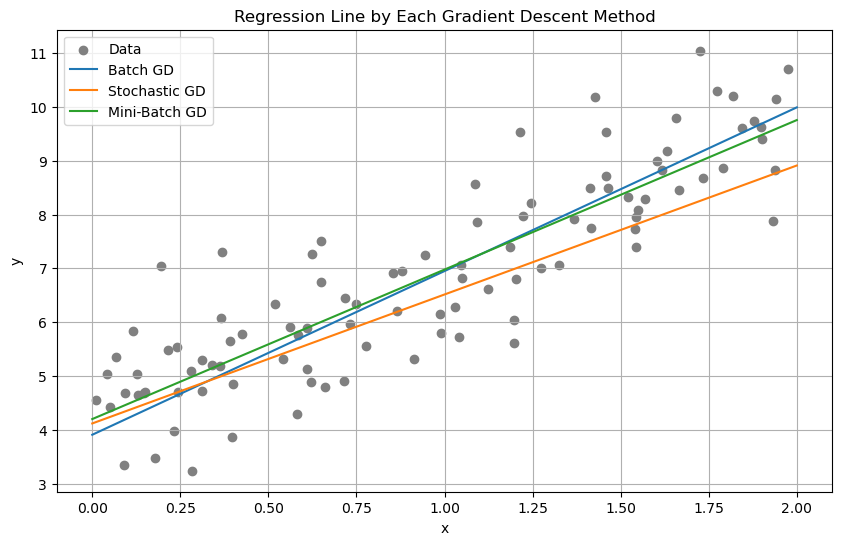

In [2]:
#  Required Libraries
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Generate Simple Linear Data
def generate_data(n_samples=100, noise=1.0):
    np.random.seed(42)
    X = 2 * np.random.rand(n_samples, 1)
    y = 4 + 3 * X + np.random.randn(n_samples, 1) * noise
    return X, y

# 2️⃣ Add Bias Term (x0 = 1) for each instance
def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

# 3️⃣ Compute the Mean Squared Error Cost Function
def compute_cost(theta, X_b, y):
    m = len(y)
    predictions = X_b.dot(theta)
    error = predictions - y
    return (1/(2*m)) * np.sum(error ** 2)

# 4️⃣ Compute Gradient of the Cost Function
def compute_gradient(theta, X_b, y):
    m = len(y)
    return (1/m) * X_b.T.dot(X_b.dot(theta) - y)

# 5️⃣ Batch Gradient Descent
def batch_gradient_descent(X_b, y, learning_rate=0.1, n_iterations=100):
    theta = np.random.randn(X_b.shape[1], 1)
    history = []
    for i in range(n_iterations):
        gradient = compute_gradient(theta, X_b, y)
        theta = theta - learning_rate * gradient
        cost = compute_cost(theta, X_b, y)
        history.append((theta.copy(), cost))
    return theta, history

# 6️⃣ Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X_b, y, learning_rate=0.1, n_epochs=50):
    m = len(y)
    theta = np.random.randn(X_b.shape[1], 1)
    history = []
    for epoch in range(n_epochs):
        for i in range(m):
            rand_idx = np.random.randint(m)
            xi = X_b[rand_idx:rand_idx+1]
            yi = y[rand_idx:rand_idx+1]
            gradient = xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradient
            cost = compute_cost(theta, X_b, y)
            history.append((theta.copy(), cost))
    return theta, history

# 7️⃣ Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X_b, y, learning_rate=0.1, n_epochs=50, batch_size=20):
    m = len(y)
    theta = np.random.randn(X_b.shape[1], 1)
    history = []
    for epoch in range(n_epochs):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradient = (1/batch_size) * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradient
            cost = compute_cost(theta, X_b, y)
            history.append((theta.copy(), cost))
    return theta, history

# 8️⃣ Visualization of Cost Function Convergence
#  Note: Batch GD has fewer updates (e.g., 100), so we use markers for visibility
#    SGD and Mini-Batch have more updates (5000 and 250 respectively), so use lines

def plot_cost_history(histories, labels):
    plt.figure(figsize=(10,6))
    for history, label in zip(histories, labels):
        costs = [cost for _, cost in history]
        if len(costs) < 200:  # Likely Batch GD
            plt.plot(costs, 'o-', label=label)
        else:
            plt.plot(costs, label=label)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Function During Gradient Descent')
    plt.legend()
    plt.grid(True)
    plt.show()

# 🔟 Plot Data and Learned Regression Lines
def plot_regression_lines(X, y, thetas, labels):
    plt.figure(figsize=(10,6))
    plt.scatter(X, y, color='gray', label='Data')
    x_line = np.array([[0], [2]])
    x_line_b = add_bias(x_line)
    for theta, label in zip(thetas, labels):
        y_pred = x_line_b.dot(theta)
        plt.plot(x_line, y_pred, label=label)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Regression Line by Each Gradient Descent Method')
    plt.legend()
    plt.grid(True)
    plt.show()

#  Main Execution Block
if __name__ == "__main__":
    X, y = generate_data()
    X_b = add_bias(X)

    theta_batch, history_batch = batch_gradient_descent(X_b, y)
    theta_sgd, history_sgd = stochastic_gradient_descent(X_b, y)
    theta_mini, history_mini = mini_batch_gradient_descent(X_b, y)

    plot_cost_history(
        histories=[history_batch, history_sgd, history_mini],
        labels=["Batch GD", "Stochastic GD", "Mini-Batch GD"]
    )

    print("Final theta (Batch):", theta_batch.ravel())
    print("Final theta (SGD):", theta_sgd.ravel())
    print("Final theta (Mini-Batch):", theta_mini.ravel())

    plot_regression_lines(
        X, y,
        thetas=[theta_batch, theta_sgd, theta_mini],
        labels=["Batch GD", "Stochastic GD", "Mini-Batch GD"]
    )
